In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import KMeans, k_means

In [2]:
desloc = pd.read_csv("flourish.csv")
coord = pd.read_csv("coordenadas.csv")
mapdf = gpd.read_file("a.shp", encoding='utf8') 

In [3]:
df = pd.merge(desloc, coord, left_on="NO_MUNICIPIO_RES", right_on="name", how="left").rename(columns={"latitude_x":"lat_destino", "longitude_x":"long_destino", "latitude_y":"lat_origem", "longitude_y":"long_origem"}).dropna()
df.head()

,NO_MUNICIPIO,NO_MUNICIPIO_RES,lat_destino,long_destino,lat_origem,long_origem,name
1,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA
2,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA
3,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA
4,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA
5,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA


In [4]:
import unicodedata

def tiraAcentos(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError:  
        pass
    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

mapdf['NM_MUNICIP'] = mapdf.apply(lambda row: tiraAcentos(row['NM_MUNICIP']), axis=1)
mapdf.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ALAGOA NOVA,2500403,"POLYGON ((-35.76231 -7.03313, -35.76065 -7.031..."
1,AREIA DE BARAUNAS,2501153,"POLYGON ((-36.99376 -7.11994, -36.99371 -7.119..."
2,SANTANA DE MANGUEIRA,2513505,"POLYGON ((-38.37213 -7.53700, -38.37175 -7.535..."
3,PAULISTA,2510907,"POLYGON ((-37.77414 -6.59796, -37.75480 -6.595..."
4,ESPERANCA,2506004,"POLYGON ((-35.92728 -7.01685, -35.92749 -7.016..."


In [5]:
df1 = pd.merge(df, mapdf, left_on="NO_MUNICIPIO", right_on="NM_MUNICIP", how="left")
df1.head()

,NO_MUNICIPIO,NO_MUNICIPIO_RES,lat_destino,long_destino,lat_origem,long_origem,name,NM_MUNICIP,CD_GEOCMU,geometry
0,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA,AGUA BRANCA,2500106,"POLYGON ((-37.70543 -7.47576, -37.70089 -7.462..."
1,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA,AGUA BRANCA,2500106,"POLYGON ((-37.70543 -7.47576, -37.70089 -7.462..."
2,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA,AGUA BRANCA,2500106,"POLYGON ((-37.70543 -7.47576, -37.70089 -7.462..."
3,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA,AGUA BRANCA,2500106,"POLYGON ((-37.70543 -7.47576, -37.70089 -7.462..."
4,AGUA BRANCA,AGUA BRANCA,-7.515105,-37.639403,-7.515105,-37.639403,AGUA BRANCA,AGUA BRANCA,2500106,"POLYGON ((-37.70543 -7.47576, -37.70089 -7.462..."


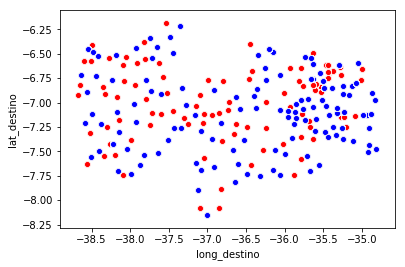

In [6]:
for col in df.columns:
    sns.scatterplot(df1["long_origem"], df1["lat_origem"], color="r")
    sns.scatterplot(df1["long_destino"], df1["lat_destino"], color="b")
plt.show()

In [8]:
x = df1.iloc[:, [2, 3, 4,5]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

No handles with labels found to put in legend.


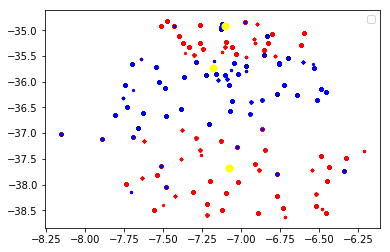

In [9]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 5, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 5, c = 'red')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 5, c = 'blue')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 5, c = 'blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow')
plt.legend()

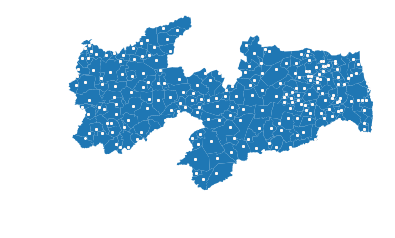

In [15]:
ax = mapdf.plot()
ax.axis('off')
sns.scatterplot(df["long_origem"], df["lat_origem"], s=1, color="purple")
sns.scatterplot(df["long_destino"], df["lat_destino"], s=1, color="b")

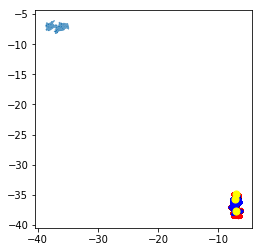

In [19]:
ax = mapdf.plot()
#ax.axis('off')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=5, c='red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=5, c='red')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=5, c='blue')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=5, c='blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow')